In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
def processar_geojsons(arquivos_geojson, crs_atual=31983, crs_destino=4326):
    geojson_list = []
    
    for arquivo in arquivos_geojson:
        # Carregar o GeoJSON
        gdf = gpd.read_file(arquivo)
        
        # Verificar e limpar geometrias inválidas ou nulas
        gdf = gdf[gdf.is_valid].dropna(subset=['geometry'])
        
        # Definir o CRS correto se ainda não estiver definido
        gdf = gdf.set_crs(epsg=crs_atual, allow_override=True)
        
        # Transformar para coordenadas globais (EPSG:4326)
        gdf = gdf.to_crs(epsg=crs_destino)
        
        geojson_list.append((arquivo, gdf))
    
    return geojson_list

def plotar_geojsons_com_contorno(sp_gdf, geojson_list, colors):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plotar o contorno da cidade de São Paulo
    sp_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=1)
    
    # Inicializar uma lista para as legendas
    legend_patches = []
    
    # Plotar cada GeoJSON com cores específicas
    for i, (nome_arquivo, gdf) in enumerate(geojson_list):
        gdf.plot(ax=ax, color=colors[i], alpha=0.7)
        
        # Criar um patch para a legenda
        patch = mpatches.Patch(color=colors[i], label=nome_arquivo)
        legend_patches.append(patch)
    
    # Adicionar a legenda ao gráfico
    plt.legend(handles=legend_patches, title="Shapefiles")
    
    plt.title("Mapas sobrepostos com contorno de São Paulo", fontsize=15)
    plt.show()


In [3]:
# Caminho para o arquivo GeoJSON de São Paulo (contorno)
sao_paulo_geojson = 'sao_paulo_contorno.geojson'

# Carregar o GeoJSON de São Paulo (contorno)
sp_gdf = gpd.read_file(sao_paulo_geojson)

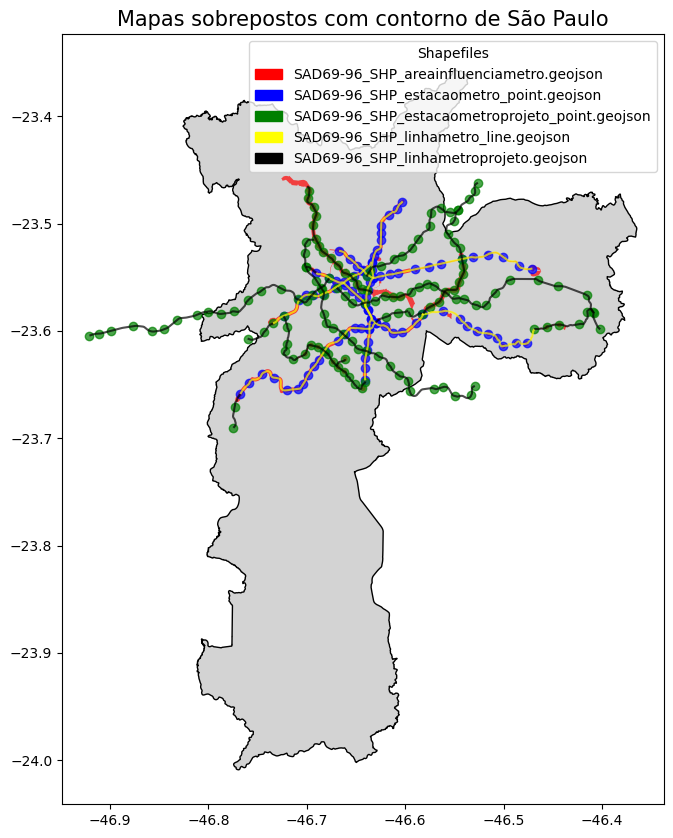

In [5]:
# Carregar e processar vários GeoJSONs
arquivos_geojson = [
    'SAD69-96_SHP_areainfluenciametro.geojson',
    'SAD69-96_SHP_estacaometro_point.geojson',
    'SAD69-96_SHP_estacaometroprojeto_point.geojson',
    'SAD69-96_SHP_linhametro_line.geojson',
    'SAD69-96_SHP_linhametroprojeto.geojson',

]

# Processar os GeoJSONs (transformar e limpar)
geojson_list = processar_geojsons(arquivos_geojson)

# Definir cores para os arquivos GeoJSON
colors = ['red', 'blue', 'green', 'yellow', 'black']

# Plotar todos os GeoJSONs no mesmo gráfico
plotar_geojsons_com_contorno(sp_gdf, geojson_list, colors)